# Part 1

## Question 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from utils.visualization_tb import part1_scatter, plot_one

# Setting the seed
np.random.seed(0)
# Creating data
n = 15
X = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(X)+X/6 + np.random.randn(n)/10

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

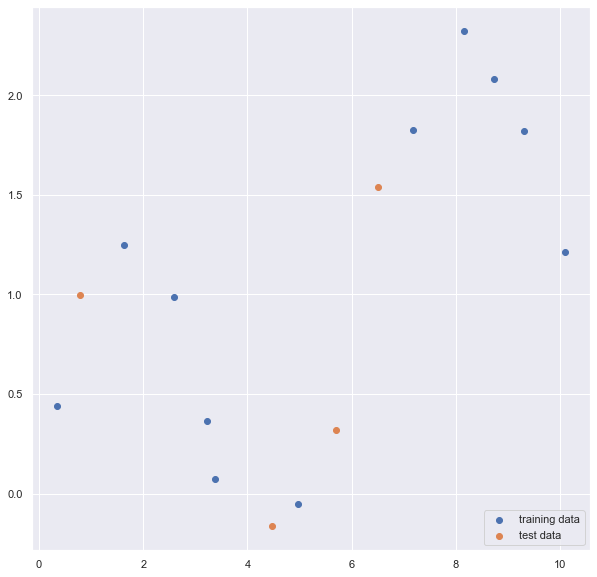

In [2]:
fig = part1_scatter(X_train, X_test, y_train, y_test)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def answer_one():
    degrees = (1, 3, 6, 9)
    to_predict = np.linspace(0, 10, 100)

    predictions_list = []

    for degree in degrees:
        poly = PolynomialFeatures(degree = degree)
        X_poly = poly.fit_transform(X.reshape(-1, 1))
        to_predict_poly = poly.fit_transform(to_predict.reshape(-1, 1))

        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0)

        model = LinearRegression()
        model.fit(X_train, y_train)

        predictions = model.predict(to_predict_poly)
        predictions_list.append(predictions)

    return np.vstack(predictions_list)

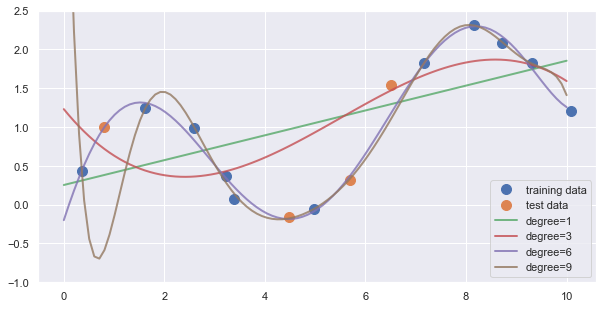

In [4]:
plot_one(answer_one(), X_train, X_test, y_train, y_test)

## Question 2

In [11]:
from sklearn.metrics import r2_score

def answer_two():
    train_scores = []
    test_scores = []

    for degree in range(10):
        poly = PolynomialFeatures(degree = degree)
        X_poly = poly.fit_transform(X.reshape(-1, 1))

        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0)

        model = LinearRegression()
        model.fit(X_train, y_train)

        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)

        train_scores.append(train_score)
        test_scores.append(test_score)

    return np.array(train_scores), np.array(test_scores)

answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247951, -0.64525377]))

## Question 3